## ANN Binary Classification


In [1]:
# Imports
import numpy as np

import torch
import torch.nn as nn

# Pytorch Gpu Configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.set_default_device(device)

import matplotlib.pyplot as plt

# Matplotlib svg plots for better pictures
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

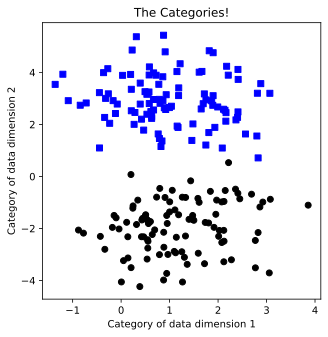

In [2]:
# Create the data
nPerCluster = 100
blur = 1  # Std Deviation of 1

A = [1, 3]
B = [1, -2]

# Generate the data
a = [
    A[0] + np.random.randn(nPerCluster) * blur,
    A[1] + np.random.randn(nPerCluster) * blur,
]
b = [
    B[0] + np.random.randn(nPerCluster) * blur,
    B[1] + np.random.randn(nPerCluster) * blur,
]

# True labels
labels_np = np.vstack((np.zeros((nPerCluster, 1)), np.ones((nPerCluster, 1))))

# Stack it into a matrix
data_np = np.hstack((a, b)).T

# Convert np matrix into a tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# Plot the data
fig = plt.figure(figsize=(5, 5))
plt.plot(
    data[np.where(labels.cpu() == 0)[0], 0].cpu(),
    data[np.where(labels.cpu() == 0)[0], 1].cpu(),
    "bs",
)
plt.plot(
    data[np.where(labels.cpu() == 1)[0], 0].cpu(),
    data[np.where(labels.cpu() == 1)[0], 1].cpu(),
    "ko",
)
plt.title("The Categories!")
plt.xlabel("Category of data dimension 1")
plt.ylabel("Category of data dimension 2")
plt.show()

In [ ]:
# Function to build a model
def createANNModel(lr):
    # Model Architecture
    ANN_classify = nn.Sequential(
        nn.Linear(2, 1),
        nn.Sigmoid(),
    )
    # Loss function
    loss_fun = nn.BCELoss()

    # optimizer
    optimizer = torch.optim.SGD(ANN_classify.parameters(), lr=lr)

    # Model Output
    return ANN_classify, loss_fun, optimizer

In [4]:
# Function to train the model
def trainTheModel(ANNmodel, n_epoches):
    # initilize losses
    losses = torch.zeros(n_epoches)

    for epoch in range(n_epoches):
        # Forward pass
        yHat = ANNmodel(data)

        # Compute the loss
        loss = loss_fun(yHat, labels)
        losses[epoch] = loss

        # Back prop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Final forward pass
    predictions = ANNmodel(data)

    total_accuracy = 100 * torch.mean(((predictions > 0.5) == labels).float())
    return losses, predictions, total_accuracy

Final Accuracy: 99.5


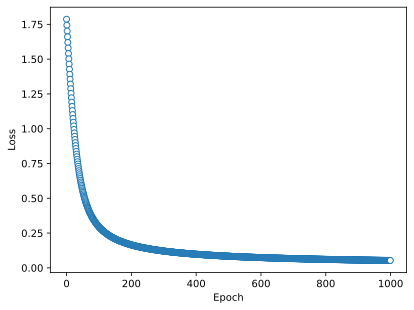

In [5]:
# Let's test it once to check that everything works
n_epoches = 1000
# Create everything
ANN_classify, loss_fun, optimizer = createANNModel(0.01)

# Run the model
losses, preditions, total_accuracy = trainTheModel(ANN_classify, n_epoches)

# Final Accuracy
print(f"Final Accuracy: {total_accuracy}")

# show the losses
plt.plot(losses.cpu().detach(), "o", markerfacecolor="w", linewidth=0.1)
plt.xlabel("Epoch"), plt.ylabel("Loss")
plt.show()

#### Real test with varying learning rate


In [6]:
# Learning rates
lrs = np.linspace(0.001, 0.1, 50)

# Initialize Output Results
accByLR = []
allLosses = np.zeros((len(lrs), n_epoches))

# Loop through lrs
for i, lr in enumerate(lrs):
    # Create and run the model
    ANN_classify, loss_fun, optimizer = createANNModel(lr)
    losses, preditions, total_accuracy = trainTheModel(ANN_classify, n_epoches)

    # Store the results
    accByLR.append(total_accuracy.cpu().detach())
    allLosses[i, :] = losses.cpu().detach()

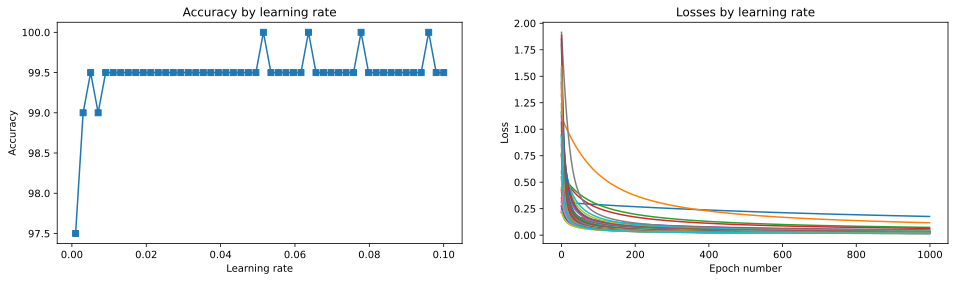

In [7]:
# Plot the result
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

ax[0].plot(lrs, accByLR, "s-")
ax[0].set_xlabel("Learning rate")
ax[0].set_ylabel("Accuracy")
ax[0].set_title("Accuracy by learning rate")

ax[1].plot(allLosses.T)
ax[1].set_title("Losses by learning rate")
ax[1].set_xlabel("Epoch number")
ax[1].set_ylabel("Loss")
plt.show()

In [8]:
# proportion of runs where the model had at least 70% accuracy
sum(torch.tensor(accByLR) > 70) / len(accByLR)

tensor(1., device='cuda:0')